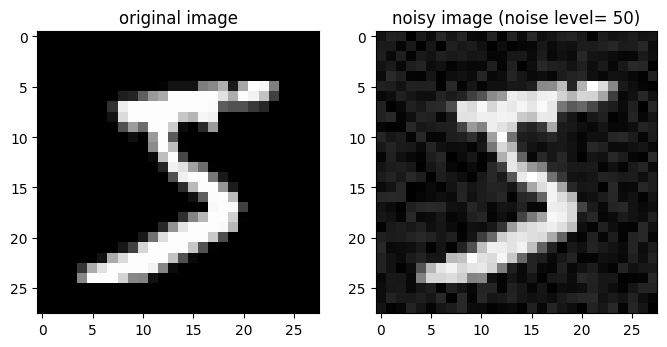

In [ ]:
### TASK 1: function that adds noise to MNIST images

#import necessary module
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

#Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

#FUNCTION
def noisy_mnist(images, y_noise):
  '''Add random noise to MNIST images.

    Parameters:
    - images (numpy.ndarray): Input images to which noise will be added.
    - y_noise (float): The magnitude of the noise to be added.

    Returns:
    numpy.ndarray: Noisy images with added random noise.

    Note:
    The function adds random noise to each pixel in the input images.
'''

  noisy_images = images + np.random.uniform(0,y_noise,images.shape)

  return noisy_images

#choose a noise level
noise_level = 50

#add noise to first training images
noisy_training_image = noisy_mnist(train_images[0], noise_level)

#plot the original and noisy images for comparison
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(train_images[0],cmap='gray')
plt.title("original image")

plt.subplot(1,2,2)
plt.imshow(noisy_training_image,cmap='gray')
plt.title(f'noisy image (noise level= {noise_level})')

plt.show()

In [ ]:
### TASK 2: train a neural network based on MNIST data, around 1 min 30 seconds runtime

#preprocess data, normalise pixel values to be in the range [0, 1] by dividing by 255.
train_images_normal = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images_normal = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

#build the neural network, models. and layers. already imported
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

#compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#train the model
history = model.fit(train_images_normal, train_labels, epochs=15, batch_size=64, validation_split=0.2)


Epoch 1/15
750/750 [==============================] - 5s 5ms/step - loss: 0.3360 - accuracy: 0.9065 - val_loss: 0.1870 - val_accuracy: 0.9469
Epoch 2/15
750/750 [==============================] - 5s 6ms/step - loss: 0.1543 - accuracy: 0.9554 - val_loss: 0.1331 - val_accuracy: 0.9617
Epoch 3/15
750/750 [==============================] - 4s 5ms/step - loss: 0.1071 - accuracy: 0.9696 - val_loss: 0.1071 - val_accuracy: 0.9678
Epoch 4/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0823 - accuracy: 0.9769 - val_loss: 0.0989 - val_accuracy: 0.9698
Epoch 5/15
750/750 [==============================] - 4s 6ms/step - loss: 0.0647 - accuracy: 0.9817 - val_loss: 0.0976 - val_accuracy: 0.9707
Epoch 6/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0527 - accuracy: 0.9846 - val_loss: 0.0913 - val_accuracy: 0.9734
Epoch 7/15
750/750 [==============================] - 4s 5ms/step - loss: 0.0417 - accuracy: 0.9885 - val_loss: 0.0857 - val_accuracy: 0.9739
Epoch 

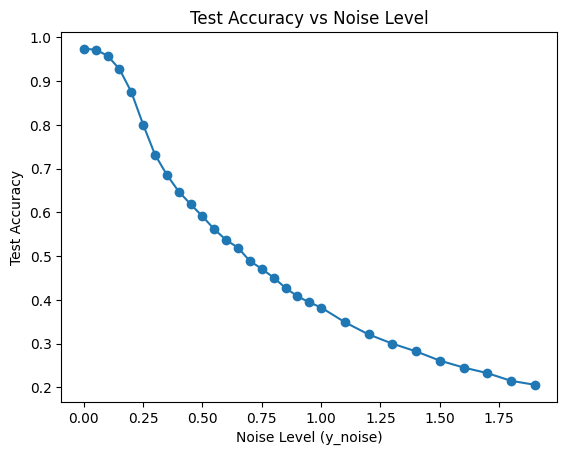

In [ ]:
### TASK 3: plot test accuracy against y_noise, around 30 second runtime

#defining a range of noise levels to experiment with
# Define noise levels with step size 0.05 between 0 and 1
noise_levels_1 = np.arange(0, 1.0, 0.05)

# Define noise levels with step size 0.1 between 1 and 2
noise_levels_2 = np.arange(1.0, 2.0, 0.1)

# Concatenate the two arrays to get the final noise levels array
noise_levels = np.concatenate([noise_levels_1, noise_levels_2])


#list to store test accuracies for different noise levels
test_accuracies = []

#loop over different noise levels
for y_noise in noise_levels:
  #add noise to test images
  noisy_test_images = noisy_mnist(test_images_normal, y_noise)

  # Evaluate the model on the noisy test set
  test_loss, test_acc = model.evaluate(noisy_test_images, test_labels, verbose=0)

  # Store the test accuracy for this noise level
  test_accuracies.append(test_acc)

# plot
plt.plot(noise_levels, test_accuracies, marker='o')
plt.xlabel('Noise Level (y_noise)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Noise Level')
plt.show()



Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.4785 - accuracy: 0.8597 - val_loss: 0.3018 - val_accuracy: 0.9143
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2875 - accuracy: 0.9161 - val_loss: 0.2595 - val_accuracy: 0.9216
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2241 - accuracy: 0.9340 - val_loss: 0.2328 - val_accuracy: 0.9326
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1797 - accuracy: 0.9470 - val_loss: 0.1855 - val_accuracy: 0.9451
Epoch 5/10
750/750 [==============================] - 3s 5ms/step - loss: 0.1483 - accuracy: 0.9562 - val_loss: 0.1794 - val_accuracy: 0.9463
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.1207 - accuracy: 0.9643 - val_loss: 0.1679 - val_accuracy: 0.9482
Epoch 7/10
750/750 [==============================] - 6s 9ms/step - loss: 0.1024 - accuracy: 0.9693 - val_loss: 0.1481 - val_accuracy: 0.9562
Epoch 

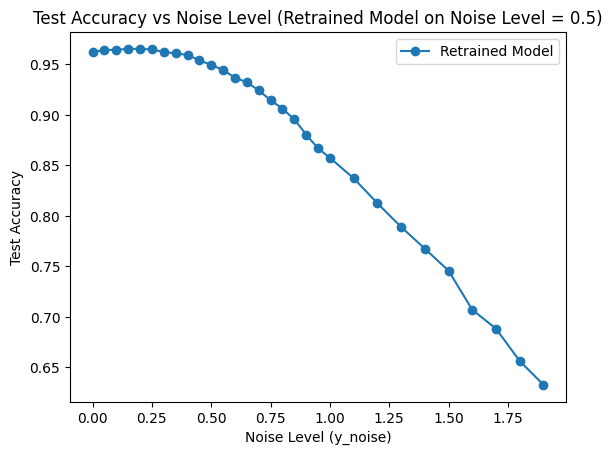

In [ ]:
### TASK 4: retrain model on one noise level and then plot plot test accuracy against y_noise again, around 2 minutes runtime

copy_train_images_normal = train_images_normal.copy() #working with a copy of the training data to ensure that any modifications made during training won't affect the original test set.

#train on a specific noise level
chosen_noise_level = 0.5

# Retrain the model with noisy training data
# First, adding noise to normalised training images
chosen_noisy_train_images = noisy_mnist(copy_train_images_normal, chosen_noise_level)

# Build and compile the model
chosen_retrained_model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])

chosen_retrained_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the retrained model
chosen_retrained_model.fit(chosen_noisy_train_images, train_labels, epochs= 10, batch_size=64, validation_split=0.2, verbose=1)


# Lists to store test accuracies for different noise levels
test_accuracies_retrained = []

# Loop over different noise levels
for y_noise in noise_levels:
    # add noise to test images
    noisy_test_images = noisy_mnist(test_images_normal, y_noise)

    # Evaluate the retrained model on the noisy test set
    test_loss_retrained, test_acc_retrained = chosen_retrained_model.evaluate(noisy_test_images, test_labels, verbose=0)

    # Store the test accuracy for this noise level
    test_accuracies_retrained.append(test_acc_retrained)

# Plotting
plt.plot(noise_levels, test_accuracies_retrained, marker='o', label='Retrained Model')
plt.xlabel('Noise Level (y_noise)')
plt.ylabel('Test Accuracy')
plt.title(f'Test Accuracy vs Noise Level (Retrained Model on Noise Level = {chosen_noise_level})')
plt.legend()
plt.show()

###CONCLUSION (TASK 5)


In evaluating the impact of noise levels on the performance of our model, several key observations emerge. When trained on a dataset without noise, the model exhibits optimal performance for noise-free input data, as anticipated. However, this performance diminishes rapidly as noise is introduced, confirming the model's sensitivity to noisy inputs.

For models trained on one specific noise level, the notable observation is the peak in performance at the noise level at which the model was trained. This indicates that the model is most adept at handling inputs with a similar noise profile to its training data. And the chosen training noise level can be adjusted to show this.

Determining the "best" level of noise is inherently subjective and hinges on the specific goals of the application. Is the objective to excel at identifying singular values or to perform adequately across a diverse range of inputs? When dealing with handwritten data (the MNIST dataset), real-world scenarios introduce variability such as lighting conditions, pen types, and photo quality. In this context, the "best" noise level is arguably the one that allows the model to generalise most effectively, manifesting as the broadest peak in the noise-performance curve. 0.75 was found to be the best at striking this balance between a large breadth and maintaining accuracy. Even when trained on higher noise level data, the model struggled to fit large amounts of noise in the data.

The definition of performance in this context may encompass the model's ability to provide accurate predictions across a diverse set of inputs. It is crucial to strike a balance between specialisation and generalisation, ensuring that the model doesn't become overly specific to the noise profile of its training data. The value accuracies of training are high enough to say the model is trained well, however there are issues with the model's ability to predict across the range of noise input values.

In conclusion, the optimal noise level for training depends on the specific requirements of the application. The overarching goal is to strike a balance that allows the model to generalize well to real-world scenarios, exhibiting robust performance across a variety of conditions. This type of notebook is applicable in fields where handwriting recognition plays a pivotal role

In [ ]:
### TASK 5: plot retrained on a bunch of noise levels to show that accuracy peaks around the noise level that data was trained on, around 6 mins run time

# Define noise levels
chosen_noise_levels = [0.25, 0.5, 0.75, 1]

# Lists to store test accuracies for different noise levels
#test_accuracies_loop = []

# Loop over different noise levels
for chosen_noise_level in chosen_noise_levels:

    # Create a copy of the normalised training images
    copy_2_train_images_normal = train_images_normal.copy()

    # Create a new figure for each noise level
    plt.figure()

    # Add noise to the training images
    chosen_noisy_train_images_2 = noisy_mnist(copy_2_train_images_normal, chosen_noise_level)

    # Build and compile the model
    chosen_retrained_model_loop = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])

    chosen_retrained_model_loop.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the retrained model
    chosen_retrained_model_loop.fit(chosen_noisy_train_images_2, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=0)

    # Lists to store test accuracies for different noise levels
    test_accuracies_retrained_loop = []

    # Loop over different noise levels
    for y_noise in noise_levels:
        # Add noise to test images
        noisy_test_images = noisy_mnist(test_images_normal, y_noise)

        # Evaluate the retrained model on the noisy test set
        test_loss_retrained, test_acc_retrained_loop = chosen_retrained_model_loop.evaluate(noisy_test_images, test_labels, verbose=0)

        # Store the test accuracy for this noise level
        test_accuracies_retrained_loop.append(test_acc_retrained_loop)

    # Plotting
    plt.plot(noise_levels, test_accuracies_retrained_loop, marker='o', label=f'Retrained Model on Noise Level = {chosen_noise_level}')
    plt.xlabel('Noise Level (y_noise)')
    plt.ylabel('Test Accuracy')
    plt.title('Test Accuracy vs Noise Level')
    plt.legend()
    plt.show()


In [ ]:
### chatgpt use

# to debug this error in task 4:

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-24-878af49b8cc8> in <cell line: 7>()
     10
     11     # Build and compile the model
---> 12     retrained_model = model.Sequential([
     13         layers.Flatten(input_shape=(28, 28)),
     14         layers.Dense(32, activation='relu'),

AttributeError: 'Sequential' object has no attribute 'Sequential'


#not chatgpt but changed optimiser used from stochastic gradient descent to adam (adaptive learning ting):

#chosen_retrained_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


SyntaxError: invalid decimal literal (<ipython-input-34-900b3cbd82ef>, line 7)